In [3]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_rows', None)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from mlxtend.frequent_patterns import fpgrowth
import pyfpgrowth
print("Successful")

Successful


In [4]:
!pip install pyfpgrowth

^C


In [5]:
market_basket_df = pd.read_csv("BigBasketRefined.csv", header=None)
print("File loaded")


File loaded


In [6]:
market_basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8386 non-null   object
 1   1       7846 non-null   object
 2   2       6676 non-null   object
 3   3       5613 non-null   object
 4   4       4603 non-null   object
 5   5       3534 non-null   object
 6   6       2355 non-null   object
 7   7       1255 non-null   object
 8   8       505 non-null    object
 9   9       104 non-null    object
dtypes: object(10)
memory usage: 655.3+ KB


In [7]:
basket_items = []
for index, row in market_basket_df.iterrows():
    cleansed_items = [item for item in row if str(item)!='nan']
    #print(f'basket size: {len(cleansed_items)}, basket:\n{cleansed_items}')
    basket_items.append(cleansed_items)
    
basket_items[:3]

[['Other Sauces',
  'Cashews',
  'Namkeen',
  'Sugar',
  'Banana',
  'Sugar Cubes',
  'Other Sweets',
  'Other Rice Products'],
 ['Utensil Scrub Pads',
  'Other Rice Products',
  'Buns & Pavs',
  'Cakes',
  'Other Dals',
  'Boiled Rice'],
 ['Urad Dal', 'Boiled Rice', 'Raisins', 'Chips', 'Other Dals', 'Almonds']]

In [8]:
from mlxtend.preprocessing import TransactionEncoder
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(basket_items).transform(basket_items)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()

,Cookies & Rusk,Foam & Gels,Glue & Tape,Marie & Milk Biscuits,Peelers & Scrapers,After Shave,Agarbatti,Almonds,Aluminium Foil & Cling Wrap,Antiseptics,...,Vanaspati,Veg & Fruit,Vermicelli,Vinegar,Wafers,Washing Bars,Whole Grains,Whole Spices,Womens Deo,Yogurt & Lassi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()

item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), 
                            columns=['frequency']).sort_values(by='frequency', 
                            ascending=False)
item_freq_df.shape, item_freq_df.head(10)

((221, 1),
                   frequency
 Other Vegetables       3020
 Root Vegetables        2845
 Beans                  2800
 Gourd & Cucumber       2080
 Brinjals               1845
 Other Dals             1731
 Banana                 1729
 Whole Spices           1514
 Organic F&V            1297
 Namkeen                1134)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

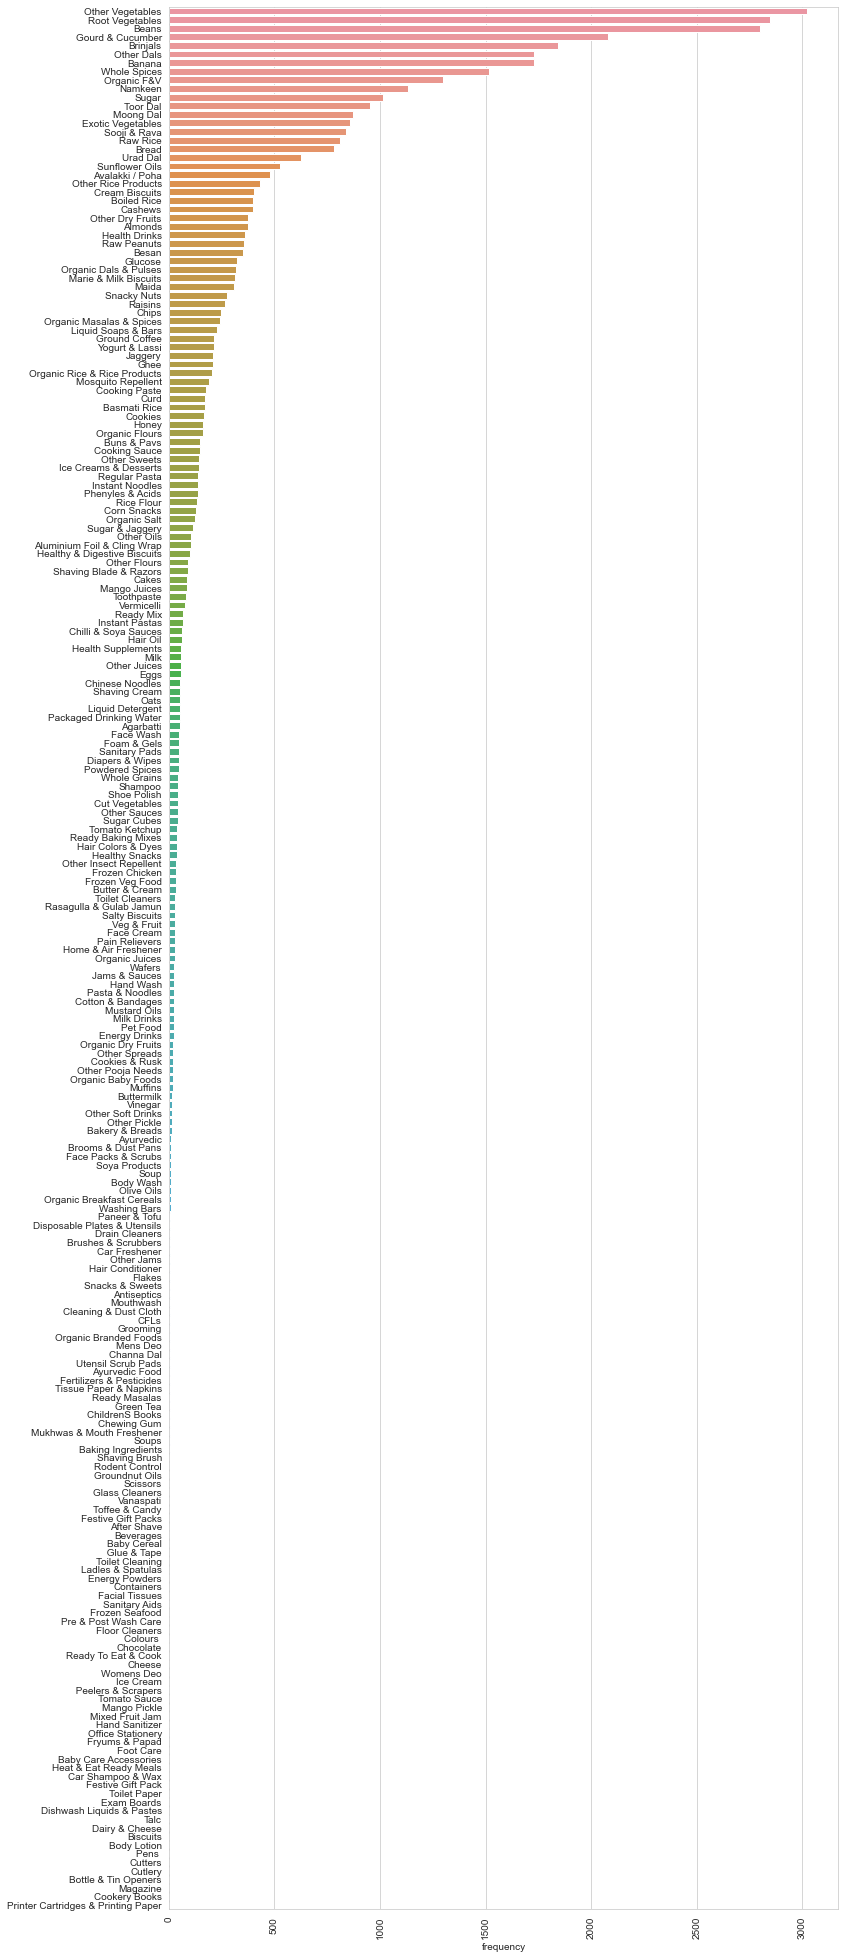

In [10]:
plt.figure(figsize=(12,35))
sns.barplot(y=item_freq_df.index, x=item_freq_df.frequency)
plt.xticks(rotation=90)

In [11]:
fpgrowth(transaction_df,min_support=0.1,use_colnames=True)

,support,itemsets
0,0.206177,(Banana)
1,0.135225,(Namkeen)
2,0.120677,(Sugar)
3,0.206415,(Other Dals)
4,0.360124,(Other Vegetables)
5,0.103983,(Moong Dal)
6,0.180539,(Whole Spices)
7,0.339256,(Root Vegetables)
8,0.113642,(Toor Dal)
9,0.154663,(Organic F&V)


In [12]:
frequent_itemsets=fpgrowth(transaction_df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.206177,(Banana)
1,0.135225,(Namkeen)
2,0.120677,(Sugar)
3,0.206415,(Other Dals)
4,0.360124,(Other Vegetables)
5,0.103983,(Moong Dal)
6,0.180539,(Whole Spices)
7,0.339256,(Root Vegetables)
8,0.113642,(Toor Dal)
9,0.154663,(Organic F&V)


In [14]:
pd.set_option('display.max_rows', 15)
freq_itemset_support = fpgrowth(transaction_df, min_support=0.03, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.206177,(Banana)
1,0.135225,(Namkeen)
2,0.120677,(Sugar)
3,0.051634,(Other Rice Products)
4,0.047341,(Cashews)
...,...,...
106,0.033150,"(Other Vegetables, Sooji & Rava)"
107,0.031004,"(Sooji & Rava, Whole Spices)"
108,0.031481,"(Beans, Exotic Vegetables)"
109,0.042213,"(Other Vegetables, Exotic Vegetables)"


In [15]:
from mlxtend.frequent_patterns import  association_rules

In [16]:
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Root Vegetables),(Other Vegetables),0.339256,0.360124,0.155736,0.459051,1.274702,0.033562,1.182877
1,(Other Vegetables),(Root Vegetables),0.360124,0.339256,0.155736,0.432450,1.274702,0.033562,1.164205
2,(Other Vegetables),(Beans),0.360124,0.333890,0.162294,0.450662,1.349733,0.042053,1.212569
3,(Beans),(Other Vegetables),0.333890,0.360124,0.162294,0.486071,1.349733,0.042053,1.245068
4,(Root Vegetables),(Beans),0.339256,0.333890,0.153709,0.453076,1.356961,0.040434,1.217920
5,(Beans),(Root Vegetables),0.333890,0.339256,0.153709,0.460357,1.356961,0.040434,1.224410
6,(Gourd & Cucumber),(Root Vegetables),0.248032,0.339256,0.106964,0.431250,1.271164,0.022818,1.161748
7,(Root Vegetables),(Gourd & Cucumber),0.339256,0.248032,0.106964,0.315290,1.271164,0.022818,1.098228
8,(Gourd & Cucumber),(Other Vegetables),0.248032,0.360124,0.132602,0.534615,1.484531,0.043280,1.374940
9,(Other Vegetables),(Gourd & Cucumber),0.360124,0.248032,0.132602,0.368212,1.484531,0.043280,1.190221


In [17]:
trans_Other_Vegetables_df = transaction_df.drop(columns=['Other Vegetables'])

freq_itemset_Other_Vegetables_supp = fpgrowth(trans_Other_Vegetables_df, min_support=0.04, use_colnames=True)
freq_itemset_Other_Vegetables_supp

,support,itemsets
0,0.206177,(Banana)
1,0.135225,(Namkeen)
2,0.120677,(Sugar)
3,0.051634,(Other Rice Products)
4,0.047341,(Cashews)
...,...,...
51,0.093489,"(Root Vegetables, Brinjals)"
52,0.089793,"(Gourd & Cucumber, Brinjals)"
53,0.044479,"(Root Vegetables, Beans, Brinjals)"
54,0.046864,"(Gourd & Cucumber, Beans, Brinjals)"


In [18]:
Other_Vegetables_assoc_rules =association_rules(freq_itemset_Other_Vegetables_supp,metric="confidence", min_threshold=0.4)
Other_Vegetables_assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Banana),(Root Vegetables),0.206177,0.339256,0.082757,0.401388,1.183143,0.012810,1.103794
1,(Moong Dal),(Other Dals),0.103983,0.206415,0.045433,0.436927,2.116734,0.023969,1.409380
2,(Root Vegetables),(Beans),0.339256,0.333890,0.153709,0.453076,1.356961,0.040434,1.217920
3,(Beans),(Root Vegetables),0.333890,0.339256,0.153709,0.460357,1.356961,0.040434,1.224410
4,(Gourd & Cucumber),(Root Vegetables),0.248032,0.339256,0.106964,0.431250,1.271164,0.022818,1.161748
...,...,...,...,...,...,...,...,...,...
11,"(Root Vegetables, Brinjals)",(Beans),0.093489,0.333890,0.044479,0.475765,1.424917,0.013264,1.270634
12,"(Beans, Brinjals)",(Root Vegetables),0.099809,0.339256,0.044479,0.445639,1.313578,0.010618,1.191903
13,"(Gourd & Cucumber, Brinjals)",(Beans),0.089793,0.333890,0.046864,0.521912,1.563127,0.016883,1.393280
14,"(Beans, Brinjals)",(Gourd & Cucumber),0.099809,0.248032,0.046864,0.469534,1.893035,0.022108,1.417560


In [19]:
Other_Vegetables_assoc_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(Gourd & Cucumber, Root Vegetables)",(Beans),0.106964,0.333890,0.059504,0.556299,1.666115,0.023790,1.501258
13,"(Gourd & Cucumber, Brinjals)",(Beans),0.089793,0.333890,0.046864,0.521912,1.563127,0.016883,1.393280
5,(Gourd & Cucumber),(Beans),0.248032,0.333890,0.126043,0.508173,1.521978,0.043228,1.354359
11,"(Root Vegetables, Brinjals)",(Beans),0.093489,0.333890,0.044479,0.475765,1.424917,0.013264,1.270634
7,"(Gourd & Cucumber, Beans)",(Root Vegetables),0.126043,0.339256,0.059504,0.472091,1.391548,0.016743,1.251625
...,...,...,...,...,...,...,...,...,...
4,(Gourd & Cucumber),(Root Vegetables),0.248032,0.339256,0.106964,0.431250,1.271164,0.022818,1.161748
9,(Brinjals),(Root Vegetables),0.220010,0.339256,0.093489,0.424932,1.252542,0.018850,1.148985
10,(Brinjals),(Gourd & Cucumber),0.220010,0.248032,0.089793,0.408130,1.645471,0.035223,1.270495
15,(Exotic Vegetables),(Root Vegetables),0.102552,0.339256,0.041498,0.404651,1.192761,0.006706,1.109844


In [20]:
%timeit fpgrowth(transaction_df,min_support=0.1)

73.9 ms ± 8.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
